In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
download_url="https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khanaabidabdal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database


100%|██████████| 92.2k/92.2k [00:00<00:00, 32.3MB/s]

In [ ]:
import pandas as pd
import json
from sqlalchemy import create_engine

In [ ]:
engine=create_engine('sqlite:///BikeStores.db')

def load_dataframe(df,table_name,engine):
  df.to_sql(table_name,con=engine,if_exists='replace',index=False)

load_dataframe(pd.read_csv('bike-store-sample-database/customers.csv'),'customers',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/orders.csv'),'orders',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/order_items.csv'),'order_items',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/products.csv'),'products',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/stores.csv'),'stores',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/staffs.csv'),'staffs',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/stocks.csv'),'stocks',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/brands.csv'),'brands',engine)
load_dataframe(pd.read_csv('bike-store-sample-database/categories.csv'),'categories',engine)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from IPython.display import display

In [ ]:
conn=sqlite3.connect('BikeStores.db')

In [ ]:
tables=pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)

In [ ]:
tables

,name
0,customers
1,orders
2,order_items
3,products
4,stores
5,staffs
6,stocks
7,brands
8,categories


In [ ]:
#Checking Type of Data
for table in tables['name']:
  display(pd.read_sql_query(f"select * from {table} limit 10",conn))


,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
5,6,Lyndsey,Bean,None,lyndsey.bean@hotmail.com,769 West Road,Fairport,NY,14450
6,7,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215
7,8,Jacquline,Duncan,None,jacquline.duncan@yahoo.com,15 Brown St.,Jackson Heights,NY,11372
8,9,Genoveva,Baldwin,None,genoveva.baldwin@msn.com,8550 Spruce Drive,Port Washington,NY,11050
9,10,Pamelia,Newman,None,pamelia.newman@gmail.com,476 Chestnut Ave.,Monroe,NY,10950


,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
5,6,94,4,2016-01-04,2016-01-07,2016-01-05,2,6
6,7,324,4,2016-01-04,2016-01-07,2016-01-05,2,6
7,8,1204,4,2016-01-04,2016-01-05,2016-01-05,2,7
8,9,60,4,2016-01-05,2016-01-08,2016-01-08,1,2
9,10,442,4,2016-01-05,2016-01-06,2016-01-06,2,6


,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
5,2,1,20,1,599.99,0.07
6,2,2,16,2,599.99,0.05
7,3,1,3,1,999.99,0.05
8,3,2,20,1,599.99,0.05
9,4,1,2,2,749.99,0.10


,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
5,6,Surly Ice Cream Truck Frameset - 2016,8,6,2016,469.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
8,9,Trek Conduit+ - 2016,9,5,2016,2999.99
9,10,Surly Straggler - 2016,8,4,2016,1549.00


,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
5,1,6,0
6,1,7,8
7,1,8,0
8,1,9,11
9,1,10,15


,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


# **Data Analysis**

## **Customer Analysis**:

In [ ]:
#What is the distribution of customers by city and state?
customer_distrbution=pd.read_sql_query("select city,state,count(*) from customers group by city,state order by count(*) desc",conn)
customer_distrbution

,city,state,count(*)
0,Mount Vernon,NY,20
1,Ballston Spa,NY,17
2,Scarsdale,NY,17
3,Canandaigua,NY,14
4,Floral Park,NY,13
...,...,...,...
190,Springfield Gardens,NY,2
191,Middle Village,NY,1
192,Tonawanda,NY,1
193,Westbury,NY,1


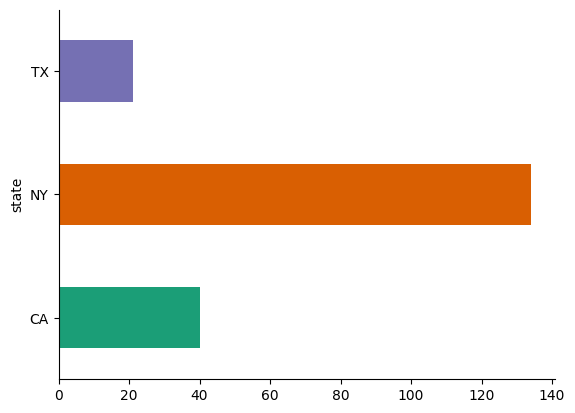

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
customer_distrbution.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#How many orders does each customer place on average?
average_orders_per_customer=pd.read_sql_query("select customer_id,count(*) as num_orders from orders group by customer_id",conn)
average_orders_per_customer

,customer_id,num_orders
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
1440,1441,1
1441,1442,1
1442,1443,1
1443,1444,1


## **Sales Analysis**

In [ ]:
#What are the total sales and the number of orders over time?
sales_over_time = pd.read_sql_query("""
SELECT
    strftime('%Y-%m', order_date) AS order_month,
    SUM(quantity * list_price) AS total_sales,
    COUNT(*) AS number_of_orders
FROM order_items
INNER JOIN orders ON order_items.order_id = orders.order_id
GROUP BY order_month
ORDER BY order_month;
""", conn)

# Print the results
sales_over_time

,order_month,total_sales,number_of_orders
0,2016-01,241184.15,147
1,2016-02,175768.10,148
2,2016-03,202157.14,140
3,2016-04,187223.55,118
4,2016-05,228701.13,146
5,2016-06,231120.29,130
6,2016-07,222854.21,139
7,2016-08,253130.83,167
8,2016-09,303282.61,192
9,2016-10,235051.79,173


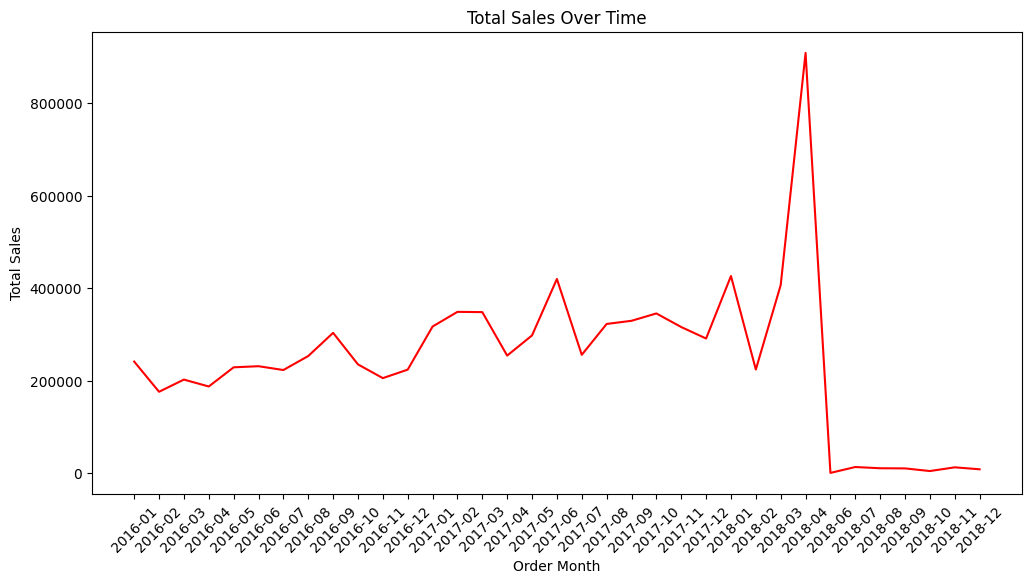

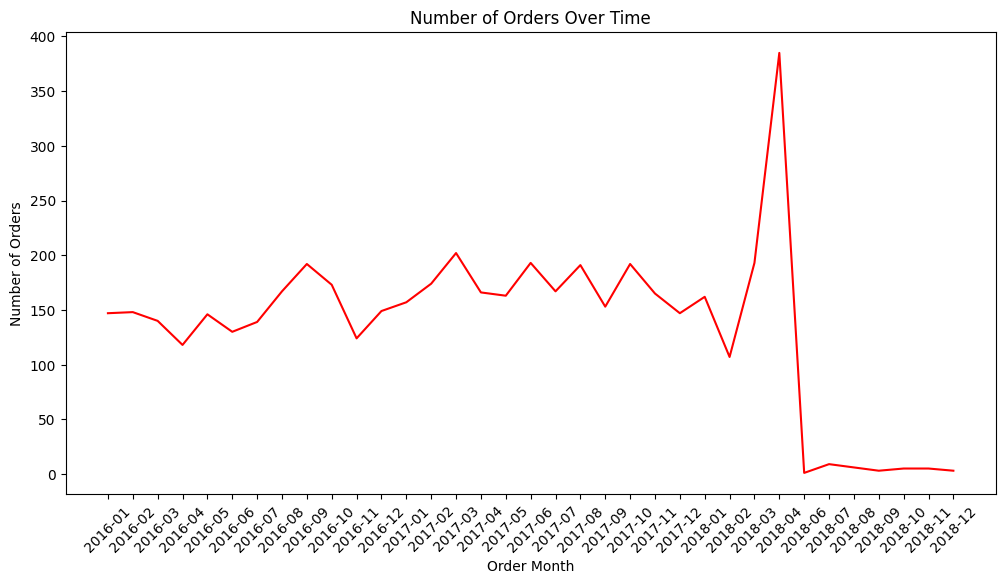

In [ ]:
# Plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['order_month'], sales_over_time['total_sales'],color='red')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()

# Plot the number of orders over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['order_month'], sales_over_time['number_of_orders'],color='red')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#What are the top-selling products and their quantities?
top_selling_products = pd.read_sql_query("""
SELECT
    p.product_name,
    SUM(oi.quantity) AS total_quantity_sold
FROM order_items oi
INNER JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC
LIMIT 10;
""", conn)

# Print the result
top_selling_products

,product_name,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296
1,Electra Townie Original 7D EQ - 2016,290
2,Electra Townie Original 21D - 2016,289
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269
4,Surly Ice Cream Truck Frameset - 2016,167
5,Trek Slash 8 27.5 - 2016,154
6,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154
7,Surly Straggler 650b - 2016,151
8,Electra Townie Original 7D - 2015/2016,148
9,Surly Straggler - 2016,147


<ipython-input-19-e8efccb01d2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantity_sold',y='product_name',data=top_selling_products,palette='Dark2');


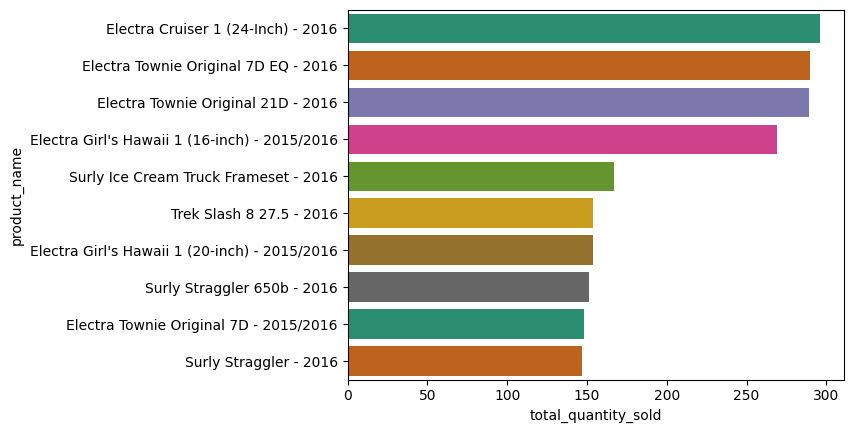

In [ ]:
sns.barplot(x='total_quantity_sold',y='product_name',data=top_selling_products,palette='Dark2');

In [ ]:
#What is the average discount given on products?
average_discount = pd.read_sql_query("""
SELECT AVG(discount) AS average_discount
FROM order_items;
""", conn)

print(f"Average discount: {average_discount['average_discount'].iloc[0]:.2f}%")

Average discount: 0.11%


In [ ]:
#What is the highest discount given and to whom it was given ?
highest_discount = pd.read_sql_query("""
SELECT c.first_name || " " || c.last_name AS customer_name, MAX(oi.discount) AS max_discount
FROM order_items oi
INNER JOIN orders o ON oi.order_id = o.order_id
INNER JOIN customers c ON o.customer_id = c.customer_id;
""", conn)

print(f"Customer with highest discount: {highest_discount['customer_name'].iloc[0]} (Discount: {highest_discount['max_discount'].iloc[0]:.2f})")


Customer with highest discount: Johnathan Velazquez (Discount: 0.20)


In [ ]:
#Which Product has the highest discount ?
product_highest_discount = pd.read_sql_query("""
SELECT p.product_name, MAX(oi.discount) AS max_discount
FROM order_items oi
INNER JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY max_discount DESC
LIMIT 1;
""",conn)

print(f"Product with highest discount: {product_highest_discount['product_name'].iloc[0]} (Discount: {product_highest_discount['max_discount'].iloc[0]:.2f})")

Product with highest discount: Trek XM700+ Lowstep - 2018 (Discount: 0.20)


## **Order Analysis**

In [ ]:
#What is the average order value?
average_order_value = pd.read_sql_query("""
SELECT AVG(order_total) AS average_order_value
FROM (
    SELECT order_id, SUM(quantity * list_price * (1 - discount)) AS order_total
    FROM order_items
    GROUP BY order_id
) AS order_totals;
""", conn)

print(f"Average order value: ${average_order_value['average_order_value'].iloc[0]:.2f}")

Average order value: $4761.06


In [ ]:
#What is the status of orders (e.g., completed, pending)?
order_status=pd.read_sql_query("""
select order_status, count(*) as total_orders
from orders
group by order_status""",conn)
order_status

,order_status,total_orders
0,1,62
1,2,63
2,3,45
3,4,1445


## **Staff Performance**:

In [ ]:
#How many orders were handled by each staff member?
staff_orders=pd.read_sql_query("""
select s.first_name || " " || s.last_name as staff_name,count(*) as total_orders
from orders o
inner join staffs s on o.staff_id=s.staff_id
group by s.staff_id
order by total_orders desc
""",conn)
staff_orders

,staff_name,total_orders
0,Marcelene Boyer,553
1,Venita Daniel,540
2,Genna Serrano,184
3,Mireya Copeland,164
4,Kali Vargas,88
5,Layla Terrell,86


<ipython-input-26-44a0dd27fbae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_orders',y='staff_name',data=staff_orders,palette='Dark2')


<Axes: xlabel='total_orders', ylabel='staff_name'>

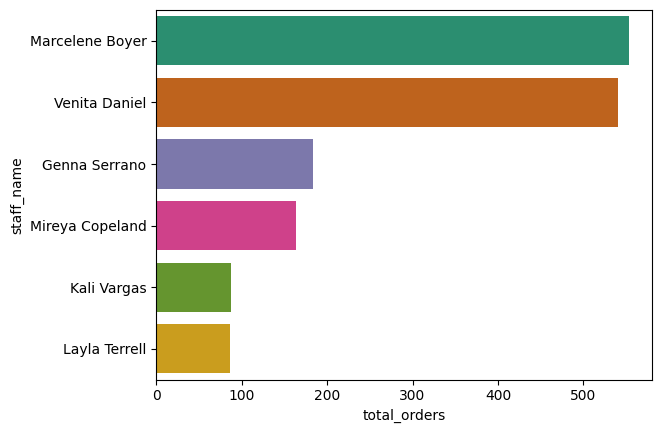

In [ ]:
sns.barplot(x='total_orders',y='staff_name',data=staff_orders,palette='Dark2')

In [ ]:
#What is the distribution of active and inactive staff?
staff_status = pd.read_sql_query("""
SELECT
    CASE
        WHEN active = 1 THEN 'Active'
        ELSE 'Inactive'
    END AS staff_status,
    COUNT(*) AS total_staff
FROM staffs
GROUP BY staff_status;
""", conn)
staff_status

,staff_status,total_staff
0,Active,10


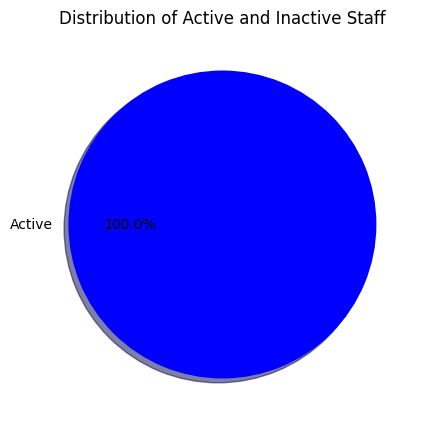

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(staff_status['total_staff'], labels=staff_status['staff_status'], autopct="%1.1f%%", shadow=True,colors=['blue','red'])
plt.title('Distribution of Active and Inactive Staff')
plt.show()


## **Store Analysis**:

In [ ]:
#What are the total sales and number of orders for each store?
sales_by_store = pd.read_sql_query("""
SELECT
    s.store_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales,
    COUNT(*) AS number_of_orders
FROM order_items oi
INNER JOIN orders o ON oi.order_id = o.order_id
INNER JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name
ORDER BY total_sales DESC;
""", conn)


sales_by_store

,store_name,total_sales,number_of_orders
0,Baldwin Bikes,5.215751e+06,3195
1,Santa Cruz Bikes,1.605823e+06,1006
2,Rowlett Bikes,8.675422e+05,521


<ipython-input-31-85d2140bfc6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='store_name', data=sales_by_store, palette='Dark2')


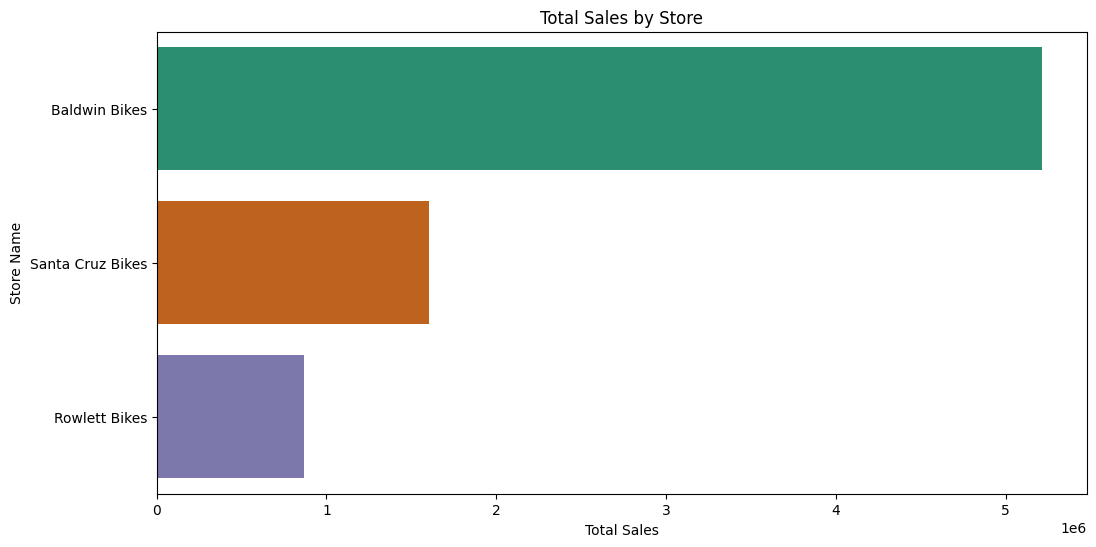

<ipython-input-31-85d2140bfc6a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_orders', y='store_name', data=sales_by_store, palette='Dark2')


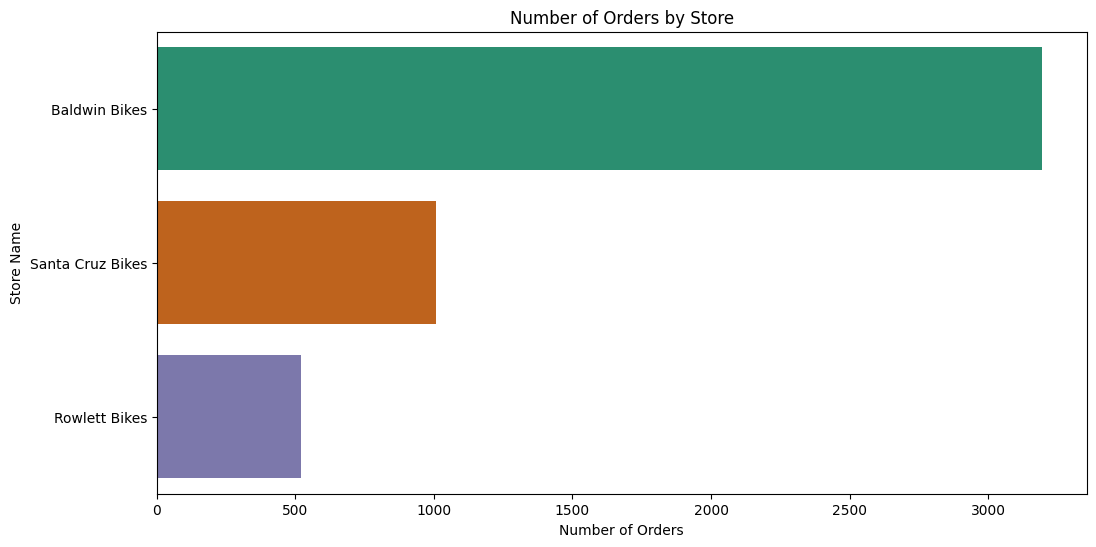

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='store_name', data=sales_by_store, palette='Dark2')
plt.xlabel('Total Sales')
plt.ylabel('Store Name')
plt.title('Total Sales by Store')
plt.show()

# Plot the number of orders by store
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_orders', y='store_name', data=sales_by_store, palette='Dark2')
plt.xlabel('Number of Orders')
plt.ylabel('Store Name')
plt.title('Number of Orders by Store')
plt.show()


In [ ]:
#How is the product inventory distributed across stores?
product_inventory = pd.read_sql_query("""
SELECT
    s.store_name,
    p.product_name,
    SUM(st.quantity) AS quantity
FROM stocks st
INNER JOIN products p ON st.product_id = p.product_id
INNER JOIN stores s ON st.store_id = s.store_id
GROUP BY s.store_name, p.product_name
ORDER BY s.store_name, p.product_name
""",conn)

product_inventory

,store_name,product_name,quantity
0,Baldwin Bikes,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,5
1,Baldwin Bikes,Electra Amsterdam Fashion 7i Ladies' - 2017,19
2,Baldwin Bikes,Electra Amsterdam Original 3i - 2015/2017,6
3,Baldwin Bikes,Electra Amsterdam Original 3i Ladies' - 2017,4
4,Baldwin Bikes,Electra Amsterdam Royal 8i - 2017/2018,10
...,...,...,...
850,Santa Cruz Bikes,Trek X-Caliber 8 - 2017,13
851,Santa Cruz Bikes,Trek X-Caliber 8 - 2018,12
852,Santa Cruz Bikes,Trek X-Caliber Frameset - 2018,15
853,Santa Cruz Bikes,Trek XM700+ - 2018,24


In [ ]:
product_inventory_pivot = pd.pivot_table(product_inventory, values='quantity', index='store_name', columns='product_name')
product_inventory_pivot

product_name,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,Electra Amsterdam Fashion 7i Ladies' - 2017,Electra Amsterdam Original 3i - 2015/2017,Electra Amsterdam Original 3i Ladies' - 2017,Electra Amsterdam Royal 8i - 2017/2018,Electra Amsterdam Royal 8i Ladies - 2018,Electra Cruiser 1 (24-Inch) - 2016,Electra Cruiser 1 - 2016/2017/2018,Electra Cruiser 1 Ladies' - 2018,Electra Cruiser 1 Tall - 2016/2018,...,Trek Superfly 24 - 2017/2018,Trek Ticket S Frame - 2018,Trek Verve+ - 2018,Trek Verve+ Lowstep - 2018,Trek X-Caliber 7 - 2018,Trek X-Caliber 8 - 2017,Trek X-Caliber 8 - 2018,Trek X-Caliber Frameset - 2018,Trek XM700+ - 2018,Trek XM700+ Lowstep - 2018
store_name,,,,,,,,,,,,,,,,,,,,,
Baldwin Bikes,5,19,6,4,10,16,17,10,6,30,...,11,18,28,10,21,29,25,30,15,27
Rowlett Bikes,25,18,2,7,10,0,27,10,0,12,...,1,23,25,8,10,11,9,15,20,29
Santa Cruz Bikes,17,25,3,1,25,10,37,14,4,12,...,23,15,26,22,21,13,12,15,24,30


In [ ]:
#Which store make highest revenue?
highest_revenue_store = pd.read_sql_query("""
SELECT
    s.store_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales
FROM order_items oi
INNER JOIN orders o ON oi.order_id = o.order_id
INNER JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name
ORDER BY total_sales DESC
LIMIT 1;
""", conn)

print(f"Store with highest revenue: {highest_revenue_store['store_name'].iloc[0]} (Total Sales: ${highest_revenue_store['total_sales'].iloc[0]:.2f})")

Store with highest revenue: Baldwin Bikes (Total Sales: $5215751.28)


## **Product Analysis**:


In [ ]:
#What is the sales performance of different brands and categories?
brand_sales = pd.read_sql_query("""
SELECT
    b.brand_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales
FROM order_items oi
INNER JOIN products p ON oi.product_id = p.product_id
INNER JOIN brands b ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY total_sales DESC;
""", conn)

brand_sales


,brand_name,total_sales
0,Trek,4.602754e+06
1,Electra,1.205321e+06
2,Surly,9.495071e+05
3,Sun Bicycles,3.419949e+05
4,Haro,1.853846e+05
5,Heller,1.714591e+05
6,Pure Cycles,1.494763e+05
7,Ritchey,7.889895e+04
8,Strider,4.320479e+03


<ipython-input-47-3d65f180e233>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='brand_name', data=brand_sales, palette='Dark2')


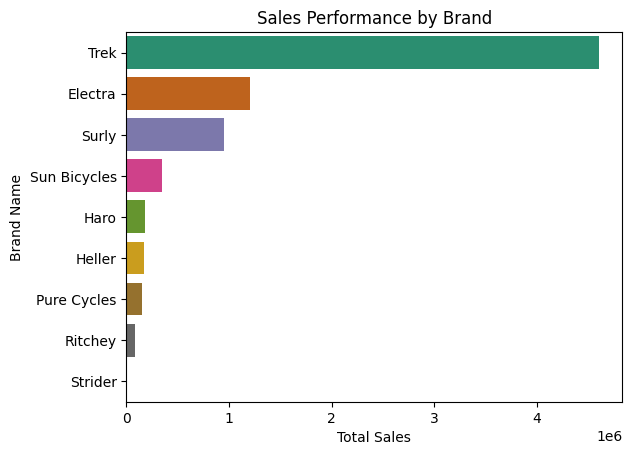

In [ ]:
sns.barplot(x='total_sales', y='brand_name', data=brand_sales, palette='Dark2')
plt.xlabel('Total Sales')
plt.ylabel('Brand Name')
plt.title('Sales Performance by Brand')
plt.show()

In [ ]:
category_sales = pd.read_sql_query("""
SELECT
    c.category_name,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales
FROM order_items oi
INNER JOIN products p ON oi.product_id = p.product_id
INNER JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_sales DESC;
""", conn)
category_sales

,category_name,total_sales
0,Mountain Bikes,2.715080e+06
1,Road Bikes,1.665098e+06
2,Cruisers Bicycles,9.950326e+05
3,Electric Bikes,9.166848e+05
4,Cyclocross Bicycles,7.110118e+05
5,Comfort Bicycles,3.940201e+05
6,Children Bicycles,2.921892e+05


<ipython-input-50-3f87edb769e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='category_name', data=category_sales, palette='Dark2')


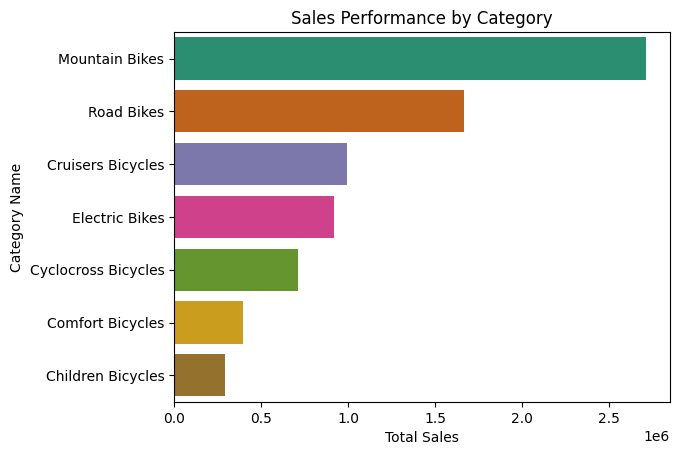

In [ ]:
sns.barplot(x='total_sales', y='category_name', data=category_sales, palette='Dark2')
plt.xlabel('Total Sales')
plt.ylabel('Category Name')
plt.title('Sales Performance by Category')
plt.show()


In [ ]:
# 10 Most Expensive Product
expensive_product=pd.read_sql_query("select product_name,list_price from products order by list_price desc limit 10",conn)
expensive_product

,product_name,list_price
0,Trek Domane SLR 9 Disc - 2018,11999.99
1,Trek Domane SLR 8 Disc - 2018,7499.99
2,Trek Silque SLR 8 Women's - 2017,6499.99
3,Trek Domane SL Frameset - 2018,6499.99
4,Trek Domane SL Frameset Women's - 2018,6499.99
5,Trek Emonda SLR 8 - 2018,6499.99
6,Trek Silque SLR 7 Women's - 2017,5999.99
7,Trek Domane SLR 6 Disc - 2017,5499.99
8,Trek Domane SL 8 Disc - 2018,5499.99
9,Trek Domane SLR 6 Disc Women's - 2018,5499.99


<ipython-input-13-8b0682dc2ffb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='list_price',y='product_name',data=expensive_product,palette='Dark2');


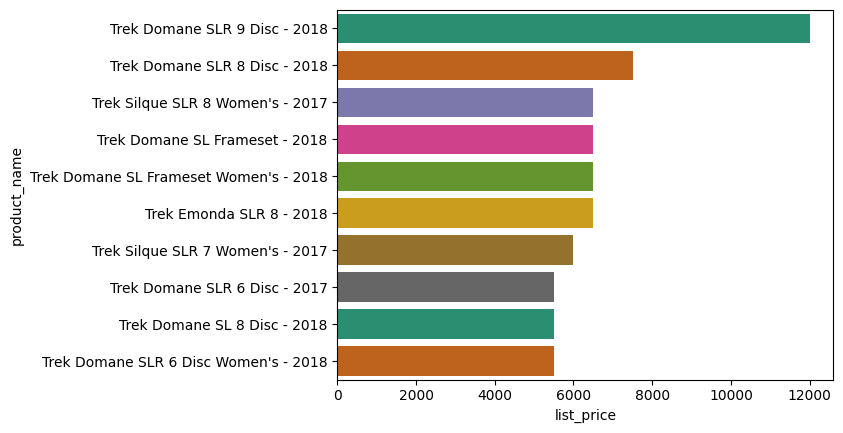

In [ ]:
sns.barplot(x='list_price',y='product_name',data=expensive_product,palette='Dark2');

In [ ]:
# 10 Most Cheapest Product
cheapest_product=pd.read_sql_query("select product_name,list_price from products order by list_price asc limit 10",conn)
cheapest_product

,product_name,list_price
0,Strider Classic 12 Balance Bike - 2018,89.99
1,Sun Bicycles Lil Kitt'n - 2017,109.99
2,Trek Boy's Kickster - 2015/2017,149.99
3,Trek Girl's Kickster - 2017,149.99
4,Trek Kickster - 2018,159.99
5,Trek Precaliber 12 Boys - 2017,189.99
6,Trek Precaliber 12 Girls - 2017,189.99
7,Trek Precaliber 12 Girl's - 2018,199.99
8,Trek Precaliber 12 Boy's - 2018,199.99
9,Trek Precaliber 16 Boys - 2017,209.99


<ipython-input-15-37055aa97222>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='list_price',y='product_name',data=cheapest_product,palette='Dark2');


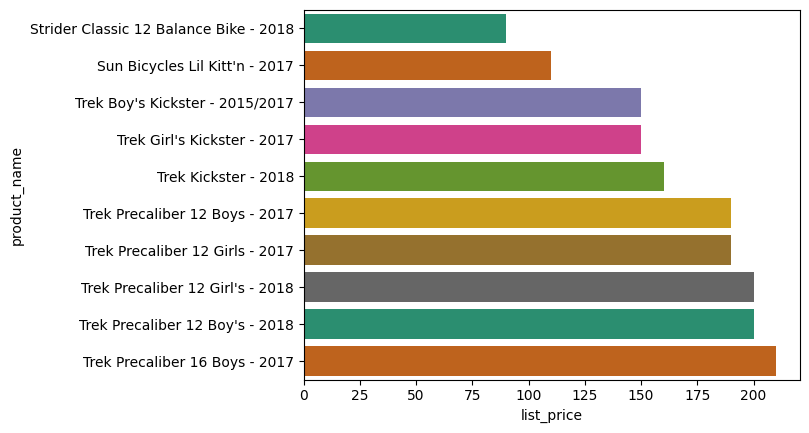

In [ ]:
sns.barplot(x='list_price',y='product_name',data=cheapest_product,palette='Dark2');